In [0]:
#˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚ TASK 1 ˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚#

In [0]:
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import col
from pyspark.sql.functions import desc, when
from pyspark.sql.functions import explode, split
from pyspark.sql.functions import count
from pyspark.sql.functions import collect_list
from pyspark.sql.functions import regexp_replace
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import expr

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[3]: [FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710945103000),
 FileInfo(path='dbfs:/FileStore/tables/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1709905302000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023', name='clinicaltrial_2023', size=292436366, modificationTime=1712167487000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv/', name='clinicaltrial_2023.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.zip', name='clinicaltrial_2023.zip', size=57166668, modificationTime=1709905902000),
 FileInfo(path='dbfs:/FileStore/tables

In [0]:
FilePath="/FileStore/tables/clinicaltrial_2023"
for line in dbutils.fs.head(FilePath).splitlines():
    print(line)

[Truncated to first 65536 bytes]
"Id	Study Title	Acronym	Status	Conditions	Interventions	Sponsor	Collaborators	Enrollment	Funder Type	Type	Study Design	Start	Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"NCT03630471	Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India	PRIDE	COMPLETED	Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)	BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care	Sangath	Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine	250.0	OTHER	INTERVENTIONAL	Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT	2018-08-20	2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
RDD = sc.textFile(FilePath)
RDD.take(3)

Out[5]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
Delimiter="\t"
RDD_Cleaned = RDD.map(lambda s: s.replace(',,', '').replace('"', '').split(Delimiter))
RDD_Cleaned.take(3)

Out[6]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28,'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascula

In [0]:
def set_length(row, length):
    return row + ([None] * (length - len(row)))

RDD_Final = RDD_Cleaned.map(lambda row: set_length(row, 14))

In [0]:
Schema = StructType([
    StructField("Id", StringType()),
    StructField("StudyTitle", StringType()),
    StructField("Acronym", StringType()),
    StructField("Status", StringType()),
    StructField("Conditions", StringType()),
    StructField("Interventions", StringType()),
    StructField("Sponsor", StringType()),
    StructField("Collaborators", StringType()),
    StructField("Enrollment", StringType()),
    StructField("FunderType", StringType()),
    StructField("Type", StringType()),
    StructField("StudyDesign", StringType()),
    StructField("Start", StringType()),
    StructField("Completion", StringType())
])

DF = spark.createDataFrame(RDD_Final, Schema)
Header = DF.first()
RDD_New = DF.rdd.filter(lambda line: line != Header)
DF = spark.createDataFrame(RDD_New, DF.schema)

DF.show()

+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+--------------+--------------------+----------+-----------+
|         Id|          StudyTitle|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|FunderType|          Type|         StudyDesign|     Start| Completion|
+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+--------------+--------------------+----------+-----------+
|NCT03630471|Effectiveness of ...|     PRIDE|         COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangath|Harvard Medical S...|     250.0|     OTHER|INTERVENTIONAL|Allocation: RANDO...|2018-08-20|2019-02-28,|
|NCT05992571|Oral Ketone Monoe...|          |        RECRUITING|Cerebrovascular 

In [0]:
DF.select('StudyTitle').distinct().show()

+--------------------+
|          StudyTitle|
+--------------------+
|Impact of Tight G...|
|InTake Care: Deve...|
|Neural Stem Cell ...|
|Computerized Brie...|
|Dutch-Depression ...|
|Reversal of the A...|
|Comparison Betwee...|
|Oral Ketone Monoe...|
|RCT of the Effect...|
|Effectiveness of ...|
|Molecular Testing...|
|Safety and Blood ...|
|Manitoba Pharmaci...|
|A Pilot Study Exp...|
|New Prognostic Pr...|
|Neuromodulation o...|
|Developing a Stan...|
|Interleukin-2 and...|
|Tailored Inhibito...|
|Promoting Wellbei...|
+--------------------+
only showing top 20 rows



In [0]:
#Question Number 1

Study_Distinct_Count = DF.select("StudyTitle").distinct().count()
print("Number Of Distinct Studies:" , Study_Distinct_Count)

Number Of Distinct Studies: 481102


In [0]:
#Question Number 2

Filtered_DF = DF.filter(col("Type") != "Type")
Type_Frequencies = Filtered_DF.withColumn("Type", when(col("Type") == "", "Blank Values").otherwise(col("Type"))).groupBy("Type").count()
Ordered_Type_Frequencies = Type_Frequencies.orderBy(desc("Count"))
Ordered_Type_Frequencies.show(truncate=False)

+---------------+------+
|Type           |count |
+---------------+------+
|INTERVENTIONAL |371382|
|OBSERVATIONAL  |110221|
|EXPANDED_ACCESS|928   |
|Blank Values   |889   |
+---------------+------+



In [0]:
#Question Number 3

Splitted_DF = DF.withColumn("Conditions", explode(split("Conditions", "\\|")))
Condition_Frequencies = Splitted_DF.groupBy("Conditions").count()
Top_5_Conditions = Condition_Frequencies.orderBy(desc("Count")).limit(5)
print("Top 5 Conditions With Frequencies:")
Top_5_Conditions.show()

Top 5 Conditions With Frequencies:
+-------------+-----+
|   Conditions|count|
+-------------+-----+
|      Healthy| 9731|
|Breast Cancer| 7502|
|      Obesity| 6549|
|       Stroke| 4072|
| Hypertension| 4020|
+-------------+-----+



In [0]:
df = spark.read.csv("/FileStore/tables/pharma", header=True, inferSchema=True)
df.show()

+--------------------+--------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+---------------+-----------------------------+------------------+--------------+------------+--------------------+-----+----------+--------------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+--------------------+
|             Company|      Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    C

In [0]:
#Question Number 4

filtered_df = DF.join(df, DF['Sponsor'] == df['Parent_Company'], 'left_anti')
joint_df = filtered_df.groupBy('Sponsor').agg(count('StudyTitle').alias('Count'))
joint_df = joint_df.orderBy(desc('Count'))
print("Top 10 Non-Pharmaceutical Sponsors With Clinical Trials:")
joint_df.show(10)

Top 10 Non-Pharmaceutical Sponsors With Clinical Trials:
+--------------------+-----+
|             Sponsor|Count|
+--------------------+-----+
|National Cancer I...| 3410|
|   Assiut University| 3335|
|    Cairo University| 3023|
|Assistance Publiq...| 2951|
|         Mayo Clinic| 2766|
|M.D. Anderson Can...| 2702|
|Novartis Pharmace...| 2393|
|National Institut...| 2340|
|Massachusetts Gen...| 2263|
|National Taiwan U...| 2181|
+--------------------+-----+
only showing top 10 rows



In [0]:
DF_SetDate = DF.withColumn("Completion", when(col("Completion").isNotNull(), regexp_replace(col("Completion").cast("string"), ",", "")).otherwise(col("Completion")))
DF_SetDate.show(5, truncate=False)

+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+----------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------+------------------------------------------------------------------------------------+----------+----------+--------------+--------------------------------------------------------------------------------------------------------------------------------------------------+----------+----------+
|Id         |StudyTitle                                                                                                                                                  |Acronym   |Status            |Conditions                                                                              |In

Completed Studies In 2023-01 : 1494
Completed Studies In 2023-02 : 1272
Completed Studies In 2023-03 : 1552
Completed Studies In 2023-04 : 1324
Completed Studies In 2023-05 : 1415
Completed Studies In 2023-06 : 1619
Completed Studies In 2023-07 : 1360
Completed Studies In 2023-08 : 1230
Completed Studies In 2023-09 : 1152
Completed Studies In 2023-10 : 1058
Completed Studies In 2023-11 : 909
Completed Studies In 2023-12 : 1082


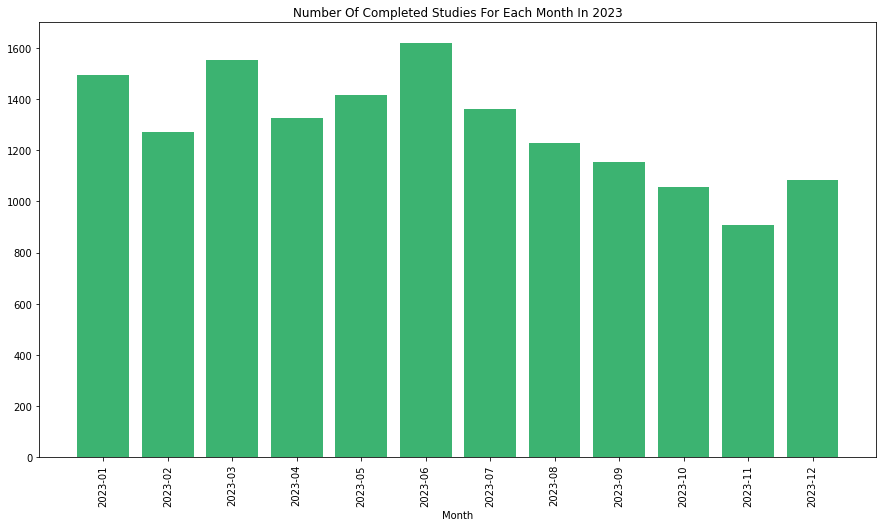

In [0]:
#Question Number 5

month_2023 = []

for month in range(1, 13):
    month_str = "2023-{0:02d}".format(month)
    month_values = (DF.filter((col("Status") == "COMPLETED") & (col("Completion").contains(month_str))).count())
    month_2023.append(month_values)
    print("Completed Studies In", month_str, ":", month_values)

months = ["2023-{0:02d}".format(month) for month in range(1, 13)]

plt.figure(figsize=(15, 8))
plt.bar(months, month_2023, color='mediumseagreen')
plt.xlabel('Month')
plt.title('Number Of Completed Studies For Each Month In 2023')
plt.xticks(rotation=90)
plt.show()

In [0]:
#˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚ EXTRA ANALYSIS ˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚#

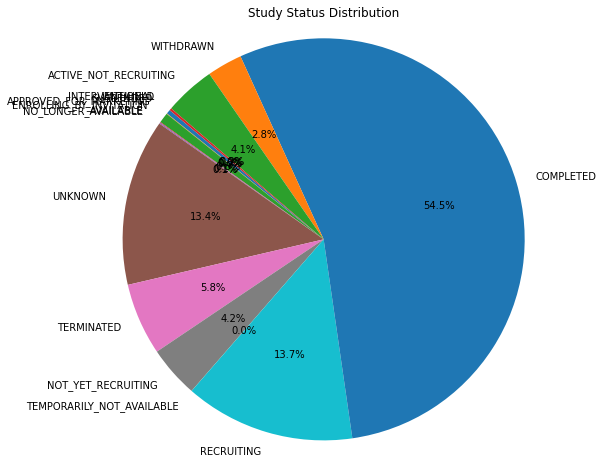

In [0]:
#Study Status Trend: Plotting the number of studies over time grouped by study status (recruiting, active, completed) to identify trends in the status of clinical trials over time.

Status_Distribution = DF.groupBy("Status").count()
Status_Distribution_Pd = Status_Distribution.toPandas()

plt.figure(figsize=(8, 8))
plt.pie(Status_Distribution_Pd["count"], labels=Status_Distribution_Pd["Status"], autopct='%1.1f%%', startangle=140)
plt.title('Study Status Distribution')
plt.axis('equal')
plt.show()

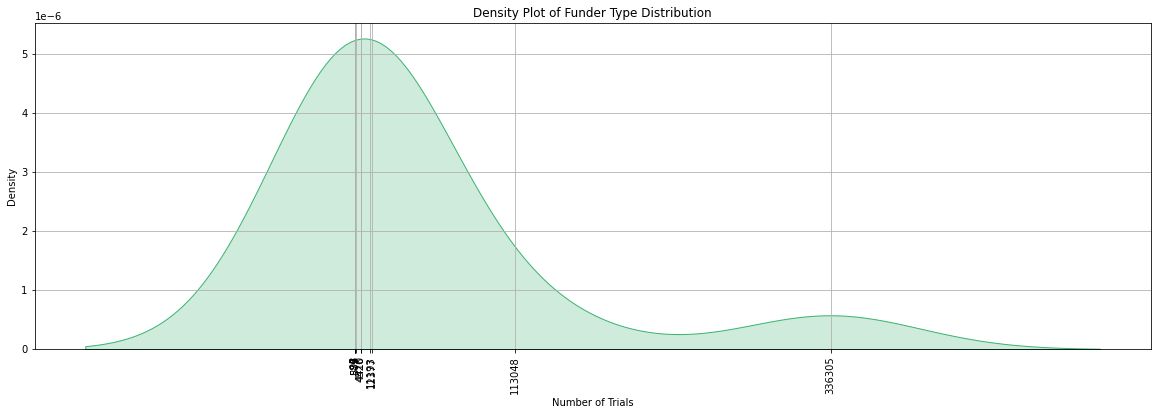

In [0]:
#Funder Type Distribution: Figuring the distribution of funder types (government, non-profit, industry) across all trials.

Funder_Type_Distribution = DF.groupBy("FunderType").count()
Funder_Type_Distribution_Pd = Funder_Type_Distribution.toPandas()

plt.figure(figsize=(20, 6))
sns.kdeplot(data=Funder_Type_Distribution_Pd["count"], color='mediumseagreen', shade=True)
plt.xlabel('Number of Trials')
plt.ylabel('Density')
plt.title('Density Plot of Funder Type Distribution')
plt.xticks(ticks=Funder_Type_Distribution_Pd["count"], labels=Funder_Type_Distribution_Pd["count"], rotation=90)
plt.grid(True)
plt.show()


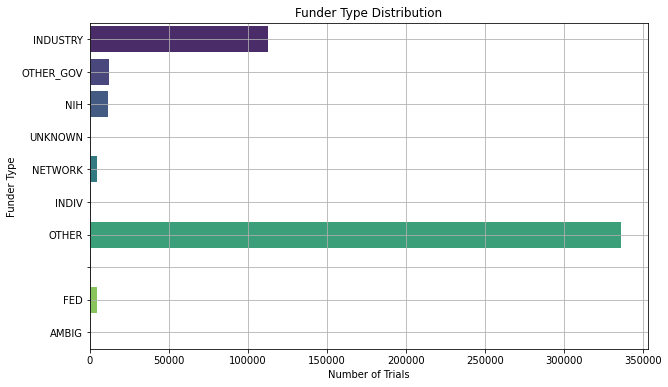

In [0]:
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="FunderType", data=Funder_Type_Distribution_Pd, palette="viridis")
plt.xlabel('Number of Trials')
plt.ylabel('Funder Type')
plt.title('Funder Type Distribution')
plt.grid(True)
plt.show()

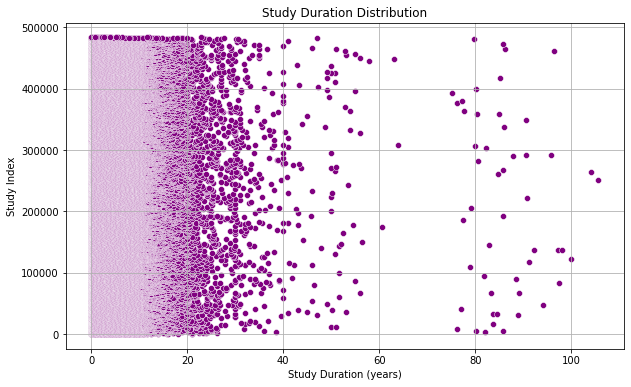

In [0]:
#Study Duration Analysis: Visualising the duration of each study (in years) and analyze the distribution of study durations.

DF = DF.withColumn("Start", expr("to_date(Start)"))
DF = DF.withColumn("Completion", expr("to_date(Completion)"))
DF = DF.withColumn("StudyDurationYears", expr("datediff(Completion, Start) / 365"))

Study_Duration_Stats = DF.selectExpr("StudyDurationYears").summary()
Study_Duration_Pd = DF.select("StudyDurationYears").toPandas()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Study_Duration_Pd, x='StudyDurationYears', y=Study_Duration_Pd.index, color='purple')
plt.xlabel('Study Duration (years)')
plt.ylabel('Study Index')
plt.title('Study Duration Distribution')
plt.grid(True)
plt.show()